In [1]:
import matplotlib.pyplot as plt
import numpy as np

import DissimilarityMetrics
import ChannelChartingCore
import Evaluation

2024-10-16 16:49:15.221153: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-16 16:49:15.999605: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
import dichasus_cf0x

2024-10-16 16:49:17.358478: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-16 16:49:17.414139: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-16 16:49:17.414537: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

### Load datapoints from file
This may take some time.

**Remove CSI from all antenna arrays except array...**

In [3]:
b=2

In [4]:
# Loading datapoints from file may take some time

groundtruth_positions = []
csi_time_domain_onearray = []
timestamps = []

for csi, pos, time in dichasus_cf0x.singlearray_trainingsets[b-1].batch(1000):
    csi_time_domain_onearray.append(csi.numpy())
    groundtruth_positions.append(pos.numpy())
    timestamps.append(time.numpy())

csi_time_domain_onearray = np.concatenate(csi_time_domain_onearray)
groundtruth_positions = np.concatenate(groundtruth_positions)
timestamps = np.concatenate(timestamps)

MEASUREMENT_INTERVAL = 0.048
timestamps = timestamps - timestamps[0]
timestamps = np.round(timestamps / MEASUREMENT_INTERVAL) * MEASUREMENT_INTERVAL

2024-10-16 16:49:46.896908: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


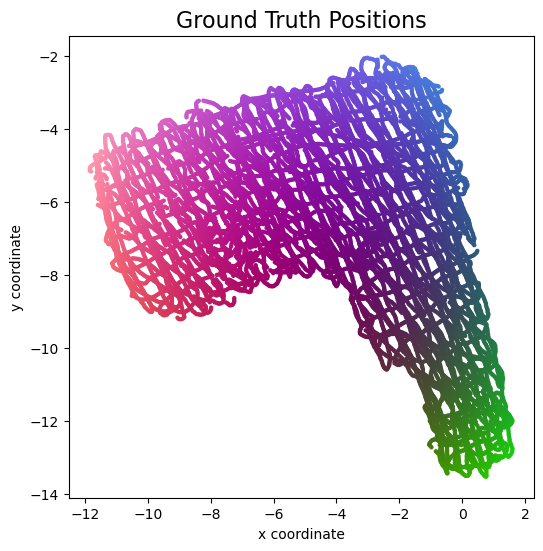

In [5]:
Evaluation.plot_colorized(groundtruth_positions, groundtruth_positions, title="Ground Truth Positions")

### Angle Delay Profile Dissimilarity

In [6]:
def mean_variance_from_delta_adp(delta_adp):
    mean = np.where(delta_adp < 1, 0,
           np.where(np.logical_and(delta_adp >= 1, delta_adp < 3), 0.01 * delta_adp + 0.01, 
           np.where(delta_adp > 3, np.inf, np.nan)))

    variance = np.where(delta_adp < 1, 0.0001,
       np.where(np.logical_and(delta_adp >= 1, delta_adp < 3), 0.0002 + 0.00005 * delta_adp, 
       np.where(delta_adp > 3, 10000, np.nan)))

    return mean, variance

adp_metric = DissimilarityMetrics.ADPDissimilarityMetric(csi_time_domain_onearray, mean_variance_from_delta_adp)

### Timestamp/Velocity-Based Dissimilarity

In [7]:
# For the single-antenna setup we assume a lower variance in the velocity model so that
# the channel charting algorithm relies more on velocity information.
velocity_mean = 0.235
velocity_variance = 0.0015

# Make worst-case assumption of perfectly correlated velocities. This maximizes the variance.
velocity_metric = DissimilarityMetrics.VelocityDissimilarityMetric(velocity_mean, velocity_variance, True, timestamps)

### Gaussian Dissimilarity Model and short path computation

This will also take some time

In [8]:
GDM = ChannelChartingCore.GaussianDissimilarityModel([adp_metric, velocity_metric], enable_path_contraction = False)
GDM.generate_short_paths(realization_count = 8)

  0%|          | 0/8 [00:00<?, ?it/s]

Generating dissimilarity realizations...


  0%|          | 0/2 [00:00<?, ?it/s]

Choosing smallest dissimilarity realization pair-wise...
Running shortest path algorithm...


Computing Shortest Paths:   0%|          | 0/104255000 [00:00<?, ?it/s]

Preparing Dijkstra Inputs:   0%|          | 0/5000 [00:00<?, ?it/s]

Starting Processes:   0%|          | 0/10 [00:00<?, ?it/s]

Generating dissimilarity realizations...


  0%|          | 0/2 [00:00<?, ?it/s]

Choosing smallest dissimilarity realization pair-wise...
Running shortest path algorithm...


Computing Shortest Paths:   0%|          | 0/104255000 [00:00<?, ?it/s]

Preparing Dijkstra Inputs:   0%|          | 0/5000 [00:00<?, ?it/s]

Starting Processes:   0%|          | 0/10 [00:00<?, ?it/s]

Generating dissimilarity realizations...


  0%|          | 0/2 [00:00<?, ?it/s]

Choosing smallest dissimilarity realization pair-wise...
Running shortest path algorithm...


Computing Shortest Paths:   0%|          | 0/104255000 [00:00<?, ?it/s]

Preparing Dijkstra Inputs:   0%|          | 0/5000 [00:00<?, ?it/s]

Starting Processes:   0%|          | 0/10 [00:00<?, ?it/s]

Generating dissimilarity realizations...


  0%|          | 0/2 [00:00<?, ?it/s]

Choosing smallest dissimilarity realization pair-wise...
Running shortest path algorithm...


Computing Shortest Paths:   0%|          | 0/104255000 [00:00<?, ?it/s]

Preparing Dijkstra Inputs:   0%|          | 0/5000 [00:00<?, ?it/s]

Starting Processes:   0%|          | 0/10 [00:00<?, ?it/s]

Generating dissimilarity realizations...


  0%|          | 0/2 [00:00<?, ?it/s]

Choosing smallest dissimilarity realization pair-wise...
Running shortest path algorithm...


Computing Shortest Paths:   0%|          | 0/104255000 [00:00<?, ?it/s]

Preparing Dijkstra Inputs:   0%|          | 0/5000 [00:00<?, ?it/s]

Starting Processes:   0%|          | 0/10 [00:00<?, ?it/s]

Generating dissimilarity realizations...


  0%|          | 0/2 [00:00<?, ?it/s]

Choosing smallest dissimilarity realization pair-wise...
Running shortest path algorithm...


Computing Shortest Paths:   0%|          | 0/104255000 [00:00<?, ?it/s]

Preparing Dijkstra Inputs:   0%|          | 0/5000 [00:00<?, ?it/s]

Starting Processes:   0%|          | 0/10 [00:00<?, ?it/s]

Generating dissimilarity realizations...


  0%|          | 0/2 [00:00<?, ?it/s]

Choosing smallest dissimilarity realization pair-wise...
Running shortest path algorithm...


Computing Shortest Paths:   0%|          | 0/104255000 [00:00<?, ?it/s]

Preparing Dijkstra Inputs:   0%|          | 0/5000 [00:00<?, ?it/s]

Starting Processes:   0%|          | 0/10 [00:00<?, ?it/s]

Generating dissimilarity realizations...


  0%|          | 0/2 [00:00<?, ?it/s]

Choosing smallest dissimilarity realization pair-wise...
Running shortest path algorithm...


Computing Shortest Paths:   0%|          | 0/104255000 [00:00<?, ?it/s]

Preparing Dijkstra Inputs:   0%|          | 0/5000 [00:00<?, ?it/s]

Starting Processes:   0%|          | 0/10 [00:00<?, ?it/s]

Determining longest short path...


Computing longest paths:   0%|          | 0/40000 [00:00<?, ?it/s]

Preparing tasks:   0%|          | 0/40000 [00:00<?, ?it/s]

Starting processes:   0%|          | 0/16 [00:00<?, ?it/s]

Longest short path has 326 hops


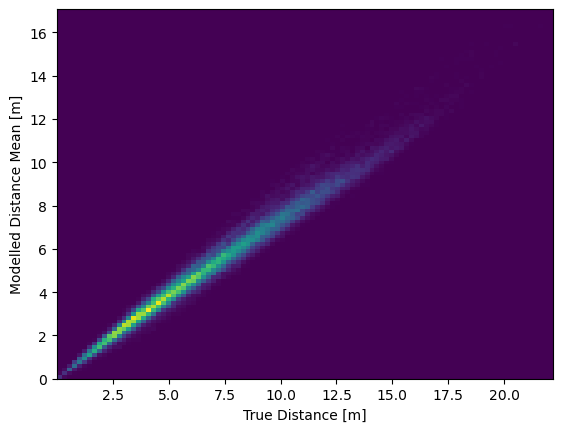

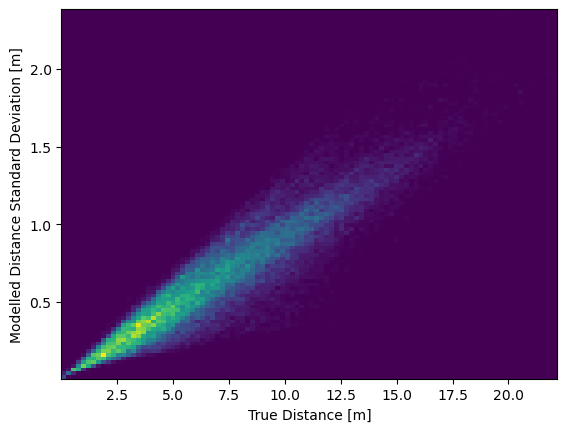

In [9]:
paths, path_hops, paths_d_mean, paths_d_variance = GDM.get_random_short_paths(50000)
groundtruth_distance_matrix = np.sqrt(np.sum((groundtruth_positions[:,np.newaxis,:] - groundtruth_positions[np.newaxis,:,:])**2, axis = -1))
groundtruth_dist = np.sum(groundtruth_distance_matrix[paths[:,:-1], paths[:,1:]], axis = 1).flatten()

plt.xlabel("True Distance [m]")
plt.ylabel("Modelled Distance Mean [m]")
plt.hist2d(groundtruth_dist, paths_d_mean, bins = 100)
plt.show()

plt.xlabel("True Distance [m]")
plt.ylabel("Modelled Distance Standard Deviation [m]")
plt.hist2d(groundtruth_dist, np.sqrt(paths_d_variance), bins = 100)
plt.show()

### Channel Chart Training

Feel free to tweak the hyperparameters!

In [10]:
MIN_BATCH_SIZE = 2500
MAX_BATCH_SIZE = 3500
LEARNING_RATE_INITIAL = 2e-2
LEARNING_RATE_FINAL = 1e-2
MAX_HOPLENGTH = 3.0
MIN_HOPLENGTH = 0.5
TRAINING_BATCHES = 3600
ACCELERATION_MEAN = 0.8
ACCELERATION_VARIANCE = 1.7
ACCELERATION_WEIGHT = 0.04

Pre-computing training paths:   0%|          | 0/3605 [00:00<?, ?it/s]

Preparing multiprocessing inputs:   0%|          | 0/3605 [00:00<?, ?it/s]

Starting Processes:   0%|          | 0/16 [00:00<?, ?it/s]

I0000 00:00:1729097719.683770   12475 service.cc:145] XLA service 0x7f1aec64f250 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1729097719.683838   12475 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 4080, Compute Capability 8.9
2024-10-16 16:55:19.807587: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-10-16 16:55:20.117168: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907
2024-10-16 16:55:20.858548: W external/local_xla/xla/service/gpu/nvptx_compiler.cc:742] The NVIDIA driver's CUDA version is 12.2 which is older than the ptxas CUDA version (12.3.107). Because the driver is older than the ptxas version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility

   1/3600 ━━━━━━━━━━━━━━━━━━━━ 5:07:49 5s/step - loss: 334.2918 - metric: 0.0000e+00

I0000 00:00:1729097722.264840   12475 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


 199/3600 ━━━━━━━━━━━━━━━━━━━━ 1:19 23ms/step - loss: 31.7072 - metric: 0.0000e+00

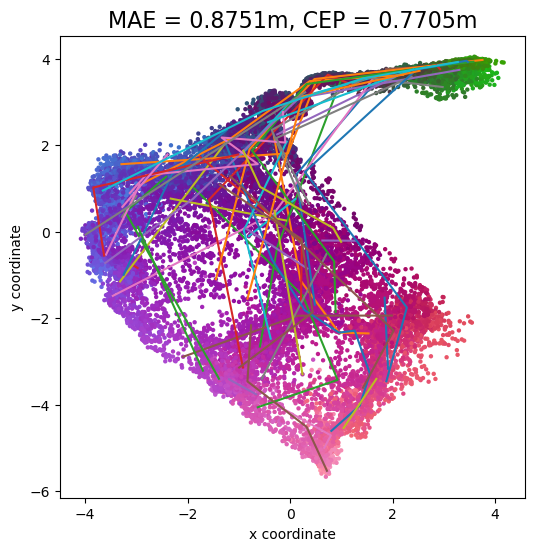

 399/3600 ━━━━━━━━━━━━━━━━━━━━ 58s 18ms/step - loss: 22.1174 - metric: 0.0000e+00

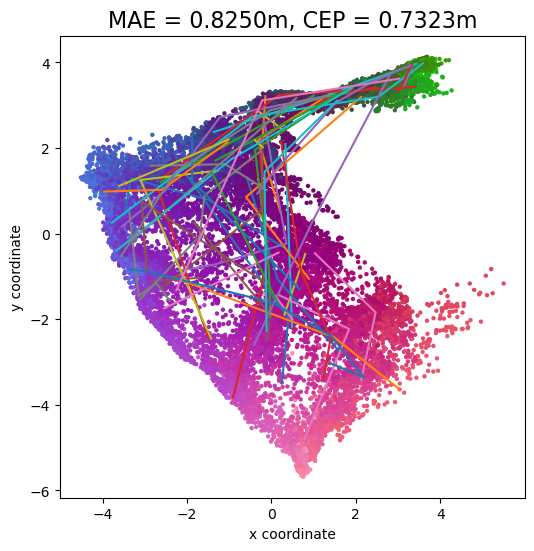

 595/3600 ━━━━━━━━━━━━━━━━━━━━ 50s 17ms/step - loss: 18.2127 - metric: 0.0000e+00

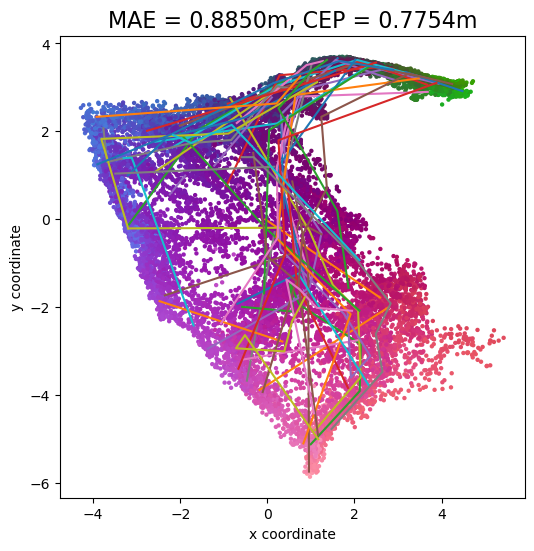

 799/3600 ━━━━━━━━━━━━━━━━━━━━ 52s 19ms/step - loss: 15.8929 - metric: 0.0000e+00

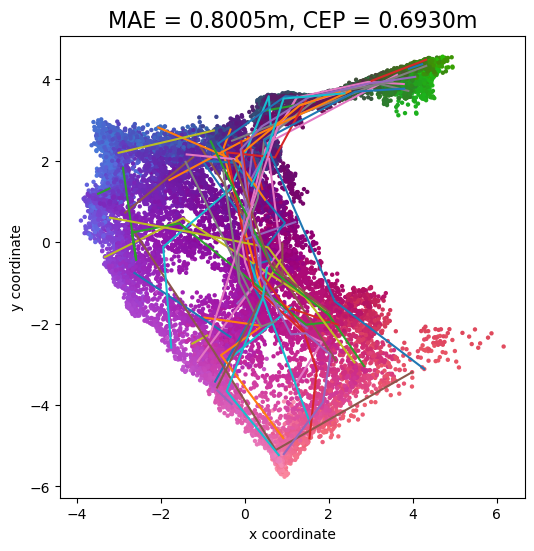

 995/3600 ━━━━━━━━━━━━━━━━━━━━ 45s 18ms/step - loss: 14.4410 - metric: 0.0000e+00

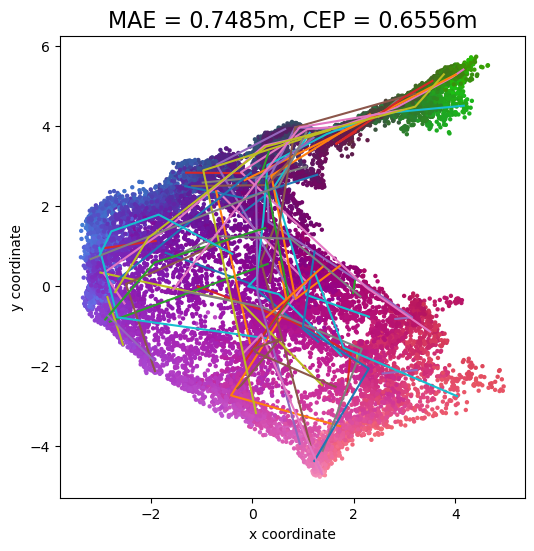

1195/3600 ━━━━━━━━━━━━━━━━━━━━ 40s 17ms/step - loss: 13.3747 - metric: 0.0000e+00

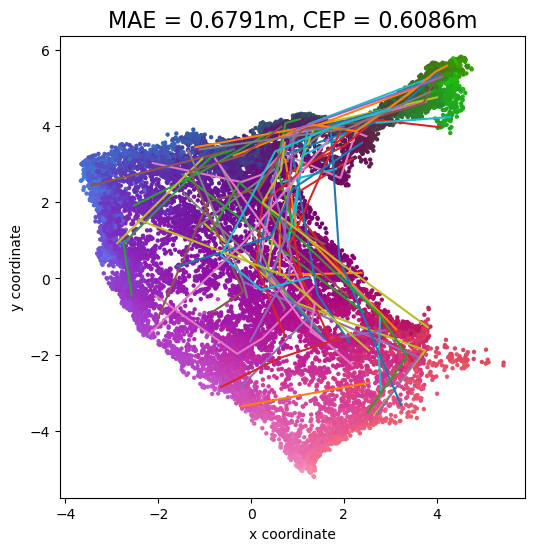

1395/3600 ━━━━━━━━━━━━━━━━━━━━ 35s 16ms/step - loss: 12.5648 - metric: 0.0000e+00

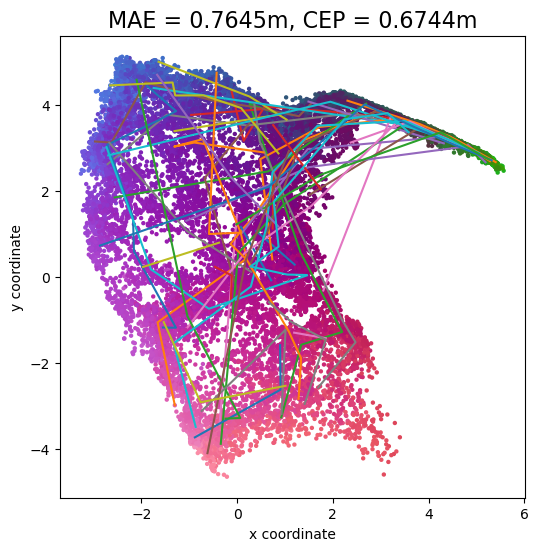

1599/3600 ━━━━━━━━━━━━━━━━━━━━ 34s 17ms/step - loss: 11.9173 - metric: 0.0000e+00

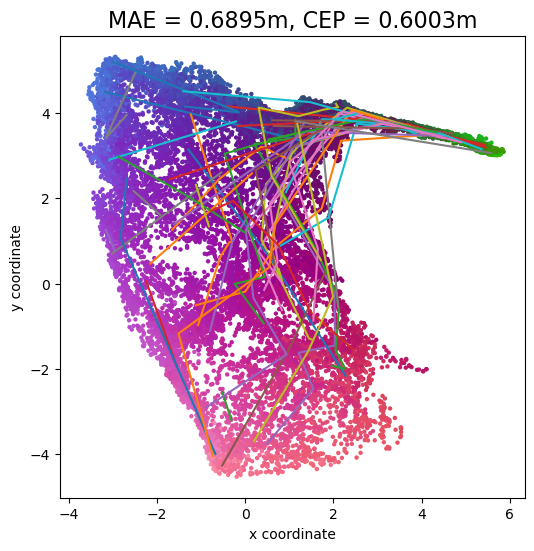

1795/3600 ━━━━━━━━━━━━━━━━━━━━ 30s 17ms/step - loss: 11.3994 - metric: 0.0000e+00

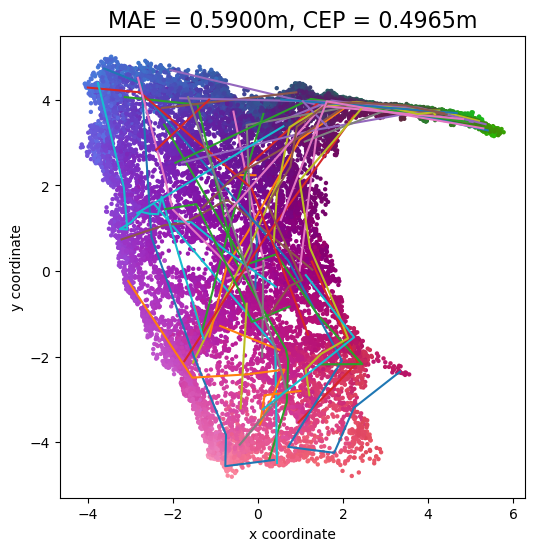

1995/3600 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - loss: 10.9470 - metric: 0.0000e+00

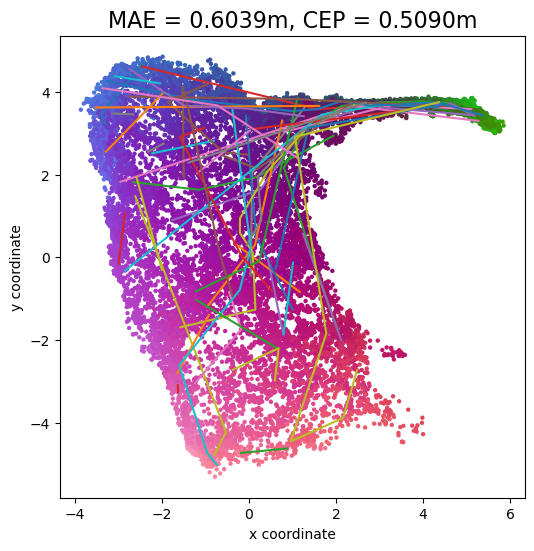

2195/3600 ━━━━━━━━━━━━━━━━━━━━ 24s 17ms/step - loss: 10.5546 - metric: 0.0000e+00

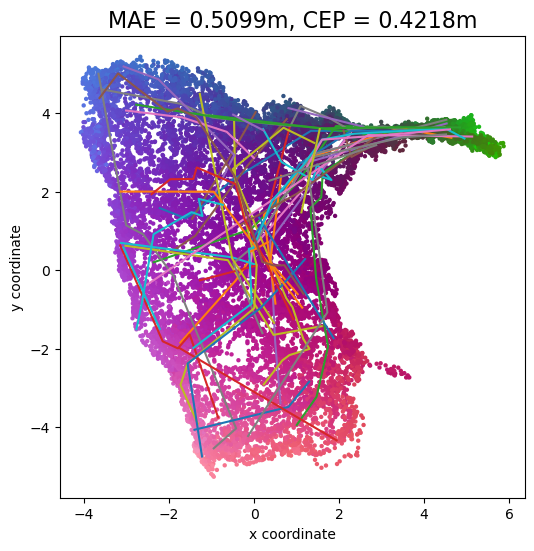

2398/3600 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - loss: 10.2047 - metric: 0.0000e+00

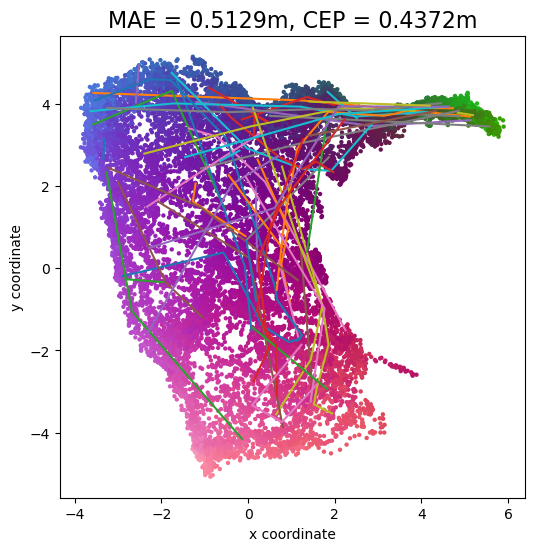

2595/3600 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - loss: 9.9048 - metric: 0.0000e+00

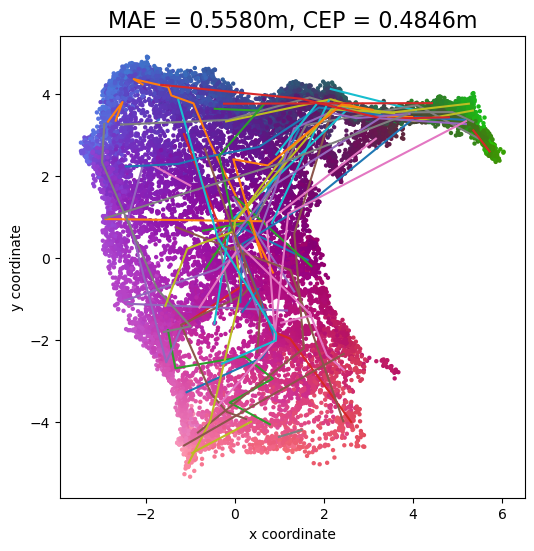

2795/3600 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - loss: 9.6329 - metric: 0.0000e+00

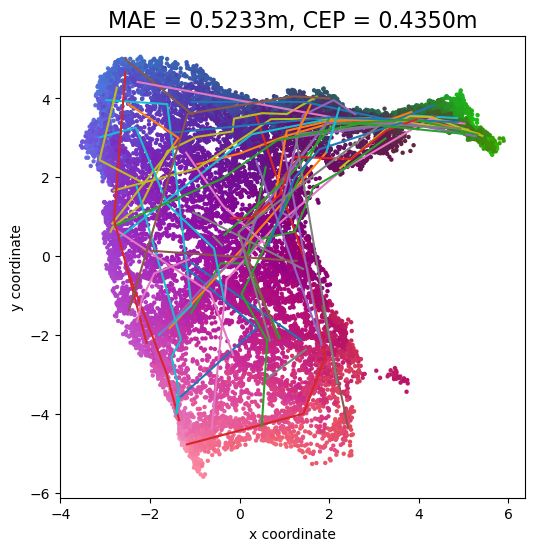

2995/3600 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - loss: 9.3871 - metric: 0.0000e+00

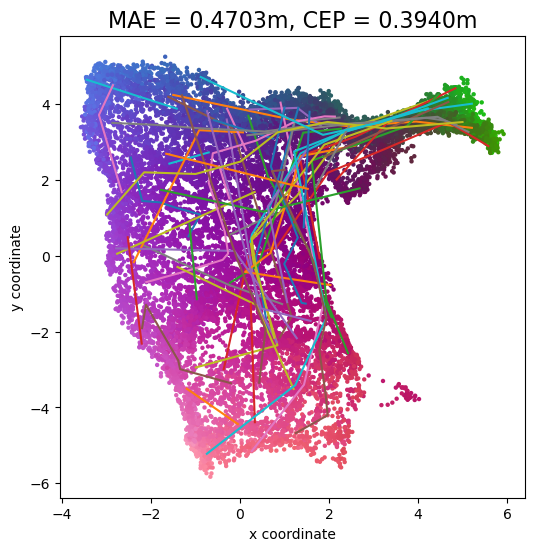

3195/3600 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 9.1622 - metric: 0.0000e+00

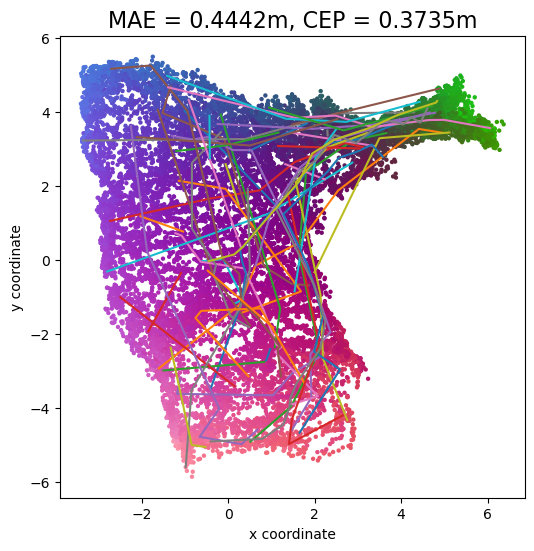

3399/3600 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 8.9515 - metric: 0.0000e+00

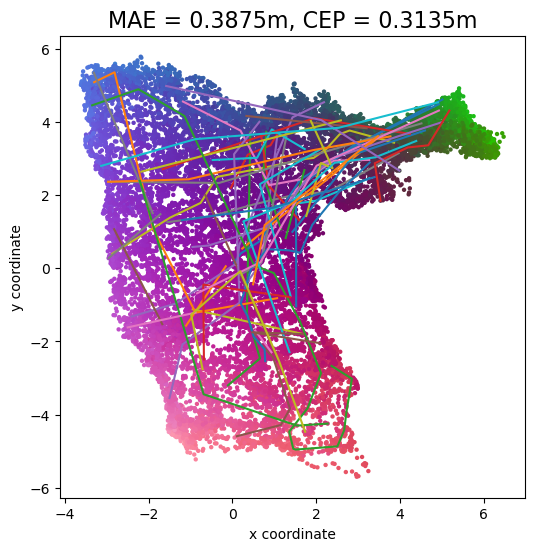

3599/3600 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 8.7608 - metric: 0.0000e+00

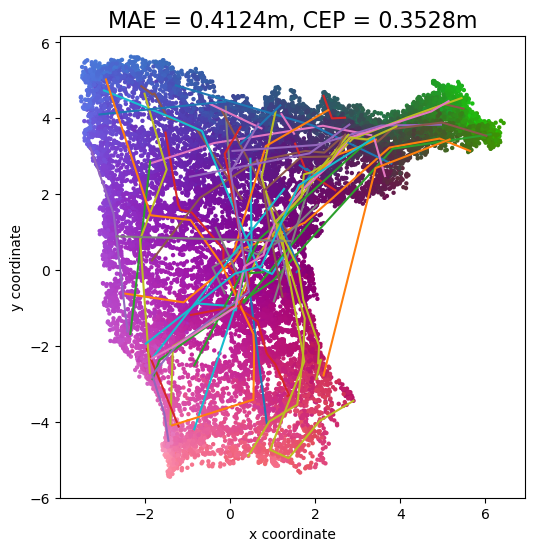

3600/3600 ━━━━━━━━━━━━━━━━━━━━ 66s 17ms/step - loss: 8.7590 - metric: 0.0000e+00


In [11]:
plot_callback = Evaluation.PlotChartCallback(groundtruth_positions, csi_time_domain_onearray.shape[0])
cc = ChannelChartingCore.ChannelChart(GDM, csi_time_domain_onearray, timestamps, min_batch_size = MIN_BATCH_SIZE, max_batch_size = MAX_BATCH_SIZE, learning_rate_initial = LEARNING_RATE_INITIAL, learning_rate_final = LEARNING_RATE_FINAL, max_hoplength = MAX_HOPLENGTH, min_hoplength = MIN_HOPLENGTH, randomize_pathhops = True, training_batches = TRAINING_BATCHES, plot_callback = plot_callback, acceleration_mean = ACCELERATION_MEAN, acceleration_variance = ACCELERATION_VARIANCE, acceleration_weight = ACCELERATION_WEIGHT)

### Evaluation on Training Set

This is a valid evaluation metric for a self-supervised training technique like Channel Charting.

In [12]:
channel_chart_positions = cc.predict(csi_time_domain_onearray)

652/652 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [13]:
ct, tw, ks = Evaluation.ct_tw_ks_on_subset(groundtruth_positions, channel_chart_positions)
print(f"CT: {ct:.4f}\nTW: {tw:.4f}\nKS: {ks:.4f}")

CT: 0.9947
TW: 0.9944
KS: 0.1110


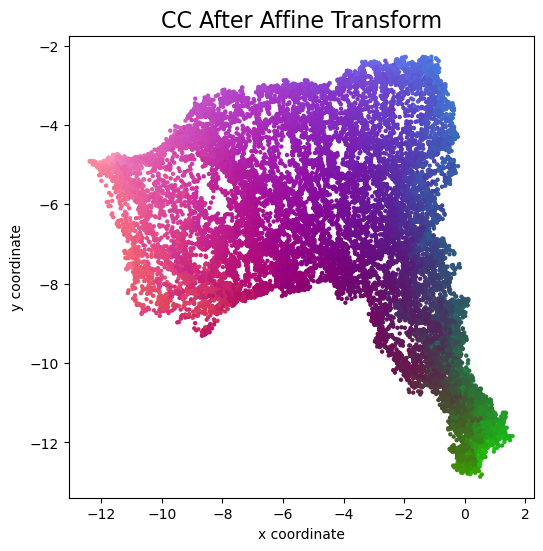

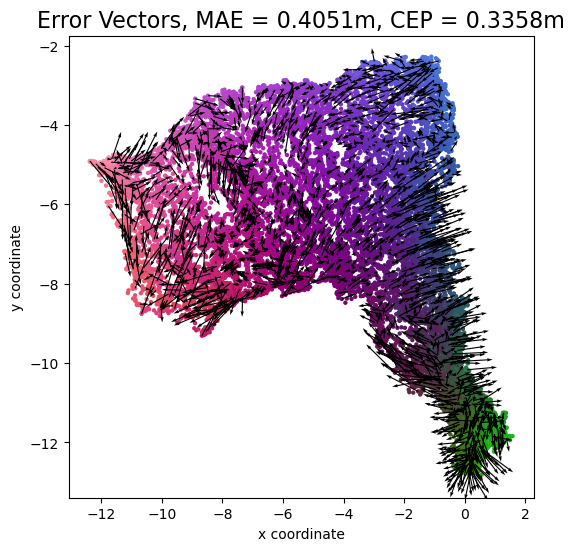

In [14]:
channel_chart_positions_transformed, errorvectors, errors, mae, cep = Evaluation.mean_absolute_error_transformed(groundtruth_positions, channel_chart_positions)
Evaluation.plot_colorized(channel_chart_positions_transformed, groundtruth_positions, title = "CC After Affine Transform")

nth_errorvector = 10
Evaluation.plot_colorized(channel_chart_positions_transformed, groundtruth_positions, title = f"Error Vectors, MAE = {mae:.4f}m, CEP = {cep:.4f}m", show = False)
plt.quiver(channel_chart_positions_transformed[::nth_errorvector, 0], channel_chart_positions_transformed[::nth_errorvector, 1], errorvectors[::nth_errorvector, 0], errorvectors[::nth_errorvector, 1], color = "black", angles = "xy", scale_units = "xy", scale = 1)
plt.show()

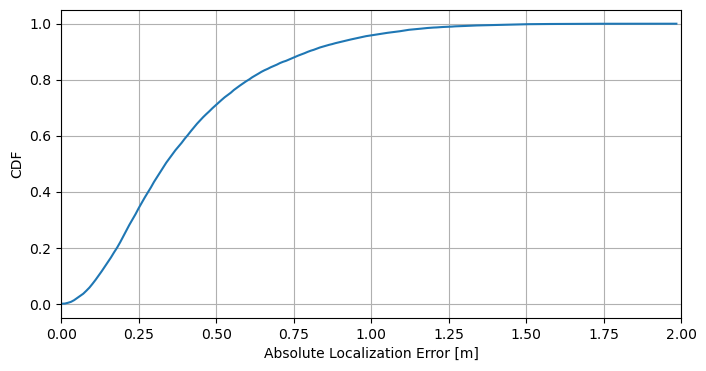

In [15]:
count, bins_count = np.histogram(errors, bins=200)
pdf = count / sum(count)
cdf = np.cumsum(pdf)

bins_count[0] = 0
cdf = np.append([0], cdf)

plt.figure(figsize=(8, 4))
plt.plot(bins_count, cdf)
plt.xlim((0, 2))
plt.xlabel("Absolute Localization Error [m]")
plt.ylabel("CDF")
plt.grid()
plt.show()

### Evaluate on Test Set
The performance on the test set is very similar to the performance we observe for the training set, as one would hope.

In [16]:
test_set_groundtruth_positions = []
test_set_csi_time_domain = []

for csi, pos, time in dichasus_cf0x.singlearray_testsets[b-1].batch(1000):
    test_set_csi_time_domain.append(csi.numpy())
    test_set_groundtruth_positions.append(pos.numpy())

test_set_csi_time_domain = np.concatenate(test_set_csi_time_domain)
test_set_groundtruth_positions = np.concatenate(test_set_groundtruth_positions)

2024-10-16 16:56:48.099244: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [17]:
test_set_channel_chart_positions = cc.predict(test_set_csi_time_domain)

652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [18]:
ts_ct, ts_tw, ts_ks = Evaluation.ct_tw_ks_on_subset(test_set_groundtruth_positions, test_set_channel_chart_positions)
print(f"CT: {ts_ct:.4f}\nTW: {ts_tw:.4f}\nKS: {ts_ks:.4f}")

CT: 0.9943
TW: 0.9941
KS: 0.1131


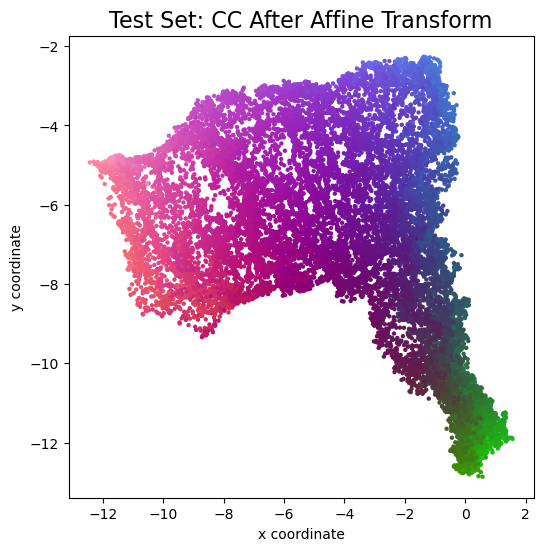

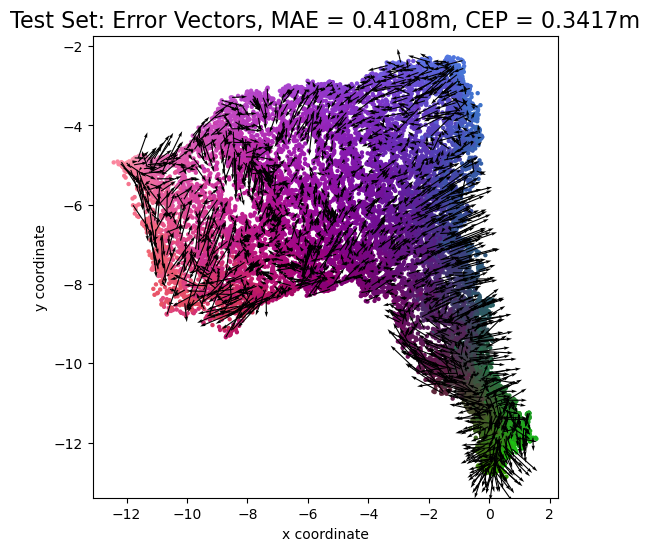

In [19]:
test_set_channel_chart_positions_transformed, ts_errorvectors, ts_errors, ts_mae, ts_cep = Evaluation.mean_absolute_error_transformed(test_set_groundtruth_positions, test_set_channel_chart_positions)
Evaluation.plot_colorized(test_set_channel_chart_positions_transformed, test_set_groundtruth_positions, title = "Test Set: CC After Affine Transform")

nth_errorvector = 10
Evaluation.plot_colorized(test_set_channel_chart_positions_transformed, test_set_groundtruth_positions, title = f"Test Set: Error Vectors, MAE = {ts_mae:.4f}m, CEP = {ts_cep:.4f}m", show = False)
plt.quiver(test_set_channel_chart_positions_transformed[::nth_errorvector, 0], test_set_channel_chart_positions_transformed[::nth_errorvector, 1], ts_errorvectors[::nth_errorvector, 0], ts_errorvectors[::nth_errorvector, 1], color = "black", angles = "xy", scale_units = "xy", scale = 1)
plt.show()